### Test Notebook

In [57]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [58]:
def makeReferenceStringWithoutLocality(length : int = 100) -> np.ndarray:
    '''
    This is a function to make a reference string with random numbers 0 -
    length of size length.


    Args:
        length (int): The length of the reference string.


    Returns:
        reference_string (np.ndarray): The reference string.
    '''

    # Check that the length is positive
    if length <= 0:
        raise ValueError("The length must be positive.")




    # Make the reference string
    reference_string = np.random.choice(np.arange(length),
                                        size = length,
                                        replace = True)

    return reference_string


def makeReferenceStringWithLocality(length: int = 100) -> np.ndarray:
    '''
    This is a function to make a reference string with of size length and
    numbers index plus a random int -3 - 3


    Args:
        length (int): The length of the reference string.


    Returns:
        reference_string (np.ndarray): The reference string.
    '''


    # Check that the length is positive
    if length <= 0:
        raise ValueError("The length must be positive.")

    # Make the reference string
    reference_string = np.arange(length) + np.random.choice(np.arange(-3,4),
                                                            length,
                                                            True)

    # Check that no references are negative or greater than the length
    # If they are set them to a proper value
    for i in range(len(reference_string)):
        if reference_string[i] < 0:
            reference_string[i] = 0
        elif reference_string[i] >= length:
            reference_string[i] = length - 1



    return reference_string



In [59]:
class PageReplacementAlg():
    '''
    This is a class to represent a page replacement algorithm.
    '''

    def __init__(self) -> None:

        self.name = "Page Replacement Algorithm"


    def run(self,
            reference_string: np.ndarray,
            frames: int =5) -> np.ndarray:

        '''

        This is the base function fot any page replacement algorithm. The
        solutions are run with their own unique algorithm function

        Args:
            reference_string (np.ndarray): The reference string.
            frames (int): The number of frames.

        Returns:

        '''

        # Check that frames is positive
        if frames <= 0:
            raise ValueError("The frames must be positive.")

        # Make the page table key
        page_table_key = ["Time Stamp", "Reference Sting"] + [
            "Frame " + str(i) for i in range(frames)] + ["Page Fault",
                                                             "Removed Page"]

        page_table_key = np.array(page_table_key, dtype = str).reshape((len(page_table_key), 1))

        # Make the time stamps
        time_stamps = np.arange(len(reference_string))

        # Make the frame table
        frames_table = np.zeros((frames, len(time_stamps)), dtype=int) - 1

        # Make the page fault and removed page
        page_fault = np.zeros(len(time_stamps), dtype=int)
        removed_page = np.zeros(len(time_stamps), dtype=int) - 1

        # loop through the reference string and run the FCFS algorithm
        for index, page in enumerate(reference_string):

            # if the index is not 0 copy the precious frames to the current frame time stamp
            if index != 0:
                frames_table[:, index] = frames_table[:, index - 1]

            # Check if the page is in the frame table at the current time stamp
            if np.any(frames_table[:, index] == page):

                # If there is show that a page wasnt removed
                removed_page[index] = -1

            # If the page is not in the frames at the current time stamp
            else:

                # Set the page fault to 1 to show one has occurred
                page_fault[index] = 1

                # Check if there is a free space in the frame table
                if np.any(frames_table[:, index] == -1):

                    # If there is, set the requested page to the first free space
                    free_space = np.where(frames_table[:, index] == -1)[0][0]
                    frames_table[free_space, index] = page

                    # Show that a page wasnt removed
                    removed_page[index] = -1

                # If there is not, run the algorithm to find the page to remove
                else:
                    remove_page_idx = self.algorithm(frames_table,
                                                 reference_string,
                                                 index)

                    page_to_be_removed = frames_table[remove_page_idx, index]

                    # Set the removed page to the page to be removed
                    if not isinstance(page_to_be_removed, np.ndarray):
                        removed_page[index] = page_to_be_removed
                    elif page_to_be_removed.size > 1:
                        removed_page[index] = page_to_be_removed[0]
                    else:
                        removed_page[index] = page_to_be_removed


                    # set the new page
                    frames_table[remove_page_idx, index] = page




        # Combine all the data into a table
        page_table = np.vstack((time_stamps, reference_string, frames_table,
                                page_fault, removed_page))

        page_table = np.hstack((page_table_key, page_table))



        return page_table


    # Generic algorithm to find the page to remove
    def algorithm(self, frames_table: np.ndarray,
                    reference_string: np.ndarray,
                    index: int) -> int:


        return 0


class FCFS(PageReplacementAlg):

    def __init__(self) -> None:
        super().__init__()
        self.name = "First Come First Served"



    def algorithm(self, frames_table: np.ndarray,
                    reference_string: np.ndarray,
                    index: int) -> int:

        '''

        This is the FCFS algorithm. It will find the first page in the
        current frames that entered the frame table and remove it.

        Args:
            frames_table (np.ndarray): The frame table.
            reference_string (np.ndarray): The reference string.
            index (int): The current index of the reference string.

        Returns:
            int: The index of the first free space in the frame table.

        '''

        # go backwards through reference string and find the first page that was inserted
        # into the frame table

        pages_added_queue = []
        # print(1)
        for i in range(index-1, -1, -1):



            # If the pages added queue is the size of frames break out of the loop
            if len(pages_added_queue) >= frames_table.shape[0] and \
                    reference_string[i] not in pages_added_queue:
                break

            if reference_string[i] not in pages_added_queue and \
                 np.any(frames_table[:, index] == reference_string[i]):

                pages_added_queue.append(reference_string[i])

            # if it is in the queue remove it and append it to the end of the queue
            elif reference_string[i]  in pages_added_queue and \
                 np.any(frames_table[:, index] == reference_string[i]):

                pages_added_queue.remove(reference_string[i])
                pages_added_queue.append(reference_string[i])




        # pop the first page in the queue
        page_to_be_removed = pages_added_queue.pop(-1)

        # find the index of the page to be removed
        remove_page_idx = list(np.where(frames_table[:, index] == page_to_be_removed)[0])

        rp1 = remove_page_idx[0]


        return rp1

In [60]:
def makeTable(table: np.ndarray,
              alg_name:str):
    '''

    This function will make the page table for the given algorithm.
    along with its color map

    Args:
        table (np.ndarray): The page table.
        alg_name (str): The name of the algorithm.

    Returns:
        table_plot: The plot of the page table.

    '''

    # make list to hold all the plots
    table_plots = []

    # Make the table all strings
    table = table.astype(str)

    # replace all -1 with blank spaces
    table[table == '-1'] = ' '


    # Making the colors
    grey_background = np.array(["#D5D8D8"] * table.shape[1])
    white_background = np.array(["#FFFFFF"] * table.shape[1])

    # make base table color map
    table_color_top = np.vstack((white_background, grey_background))
    frame_colors = np.repeat(white_background,
                             table.shape[0] - 4, axis=0).reshape(table.shape[0] - 4,
                                                                 table.shape[1])
    table_color_bottom = np.vstack((grey_background, white_background))

    table_color_map = np.vstack((table_color_top, frame_colors, table_color_bottom))



    # Make an empty base table for graphing
    base_table = np.copy(table)

    base_table[2:,1:] = ' '


    table_plots.append((base_table, table_color_map))

    # Make the table for the algorithm
    updated_table = np.copy(base_table)

    # Make the updated table color map
    updated_table_color_map = np.copy(table_color_map)

    # loop through each time step making an updated table
    for i in range(1, table.shape[1]):

        # Make a copy of the base table
        updated_table = np.copy(updated_table)

        # Make the updated table
        updated_table[:, i:] = table[:, i:]

        # Copy the updated table color map
        updated_table_color_map = np.copy(updated_table_color_map)

        # Make the updated table color map
        updated_table_color_map[:, i:] = table_color_map[:, i:]

        # Find where the ref was inserted
        insert_idx = list(np.where(table[:, i] == table[1, i])[0])
        if table[1, i] == '`':
            insert_idx = insert_idx[-2]
        else:
            insert_idx = insert_idx[-1]

        # set if it had a fault
        # make it X and set cell to red
        if table[table.shape[0] - 2, i] == '1':
            updated_table[table.shape[0] - 2, i] = 'X'

            # make the  cell red
            updated_table_color_map[insert_idx, i] = '#ff002f'

            # Handle the replacement cell
            if table[-1, i] == '-1':
                updated_table[-1, i] = ' '
            else:
                updated_table[-1, i] = table[-1, i]


        # set if it had not had a fault
        # make the sell blank and set it to green
        else:
            updated_table[table.shape[0] - 2, i] = ' '

            # make the  cell green
            updated_table_color_map[insert_idx, i] = '#2deb56'

        # Add the updated table to the list of plots
        table_plots.append((updated_table, updated_table_color_map))


    return table_plots


In [61]:
def plotTable(tables : tuple, alg_name: str):
    '''
    This is a function to plot the tables.

    Args:
        tables (tuple): The table to be plotted.
        alg_name (str): The name of the algorithm.

    Returns:
        None.

    '''
    # for table in tables:
        # get the table and the color map
    table = tables[-1]

    table, color_map = table

    # make figure and axes
    fig, ax = plt.subplots(figsize=(30, 30))

    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    table_row_names = table[:,0]

    table = table[:,1:]

    row_colors = color_map[:,0]
    color_map = color_map[:,1:]

    # plot the table
    ax.table(cellText=table,
             cellColours=color_map,
             rowLabels=table_row_names,
             rowColours=row_colors,
             cellLoc='center')


    # set the title
    ax.set_title(alg_name)

    # fig.tight_layout()



    fig.show()

    return 1


In [ ]:
def plotlyTable(tables : tuple, alg_name: str):
    '''
    This is a function to plot the tables.

    Args:
        tables (tuple): The table to be plotted.
        alg_name (str): The name of the algorithm.

    Returns:
        None.

    '''
    # for table in tables:
        # get the table and the color map
    table = tables[-1]

    table, color_map = table

    # make figure and axes
    fig, ax = plt.subplots(figsize=(30, 30))

    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    table_row_names = table[:,0]

    table = table[:,1:]

    row_colors = color_map[:,0]
    color_map = color_map[:,1:]

    # plot the table
    ax.table(cellText=table,
             cellColours=color_map,
             rowLabels=table_row_names,
             rowColours=row_colors,
             cellLoc='center')


    # set the title
    ax.set_title(alg_name)

    # fig.tight_layout()



    fig.show()

    return 1


In [62]:
def plotTables(results: dict, col_amt: int = None):
    '''
    This function will plot the results of the page replacement algorithms.
    Args:
        results (dict): The results of the page replacement algorithms.
        col_amt (int): The amount of columns display

    Returns:

    '''



    # Check that the results dictionary is not empty
    if not results:
        raise ValueError("The results dictionary is empty")

    # Make result plots dictionary
    result_plots = {}

    # loop through each algorithm in the results dictionary
    for alg_name, alg_results in results.items():

        result_plots[alg_name] = []

        # Loop through all the tables in the results
        # and plot them
        for table in alg_results:

            # If col_amt is not none
            if col_amt is None:

                result_plots[alg_name].append(makeTable(table, alg_name))

            else:
                cut_table = table[:,:col_amt+1]
                result_plots[alg_name].append(makeTable( cut_table, alg_name))



        # Plot the results
        final_plots = {}
        for alg_name, tabels in result_plots.items():

            final_plots[alg_name] = []

            # loop through each table in the results
            for table in tabels:

                final_plots[alg_name].append(plotTable(table, alg_name))




        print("fdfd")




In [63]:


def simulatePageReplacement(times_to_run: int = 5,
                            frames: int = 5,
                            reference_string_length: int = 100,
                            locality: bool = False,
                            plot_tables: bool = True,
                            algorithms: list = None) -> None:

    '''
    This is a function to simulate the page replacement algorithms.

    Args:
        times_to_run (int): The number of times to run the simulation for
        each algorithm. frames (int): The number of frames.
        reference_string_length (int): The length of the reference string.
        locality (bool): If True, the reference string will have locality.
        algorithms (list): The list of algorithms to run.

    '''

    # Checking arguments
    if list is None:
        raise ValueError("The algorithms must be a list.")

    if times_to_run <= 0:
        raise ValueError("The run time must be positive.")

    if frames <= 0:
        raise ValueError("The frames must be positive.")

    # make the a reference string for each time to run
    if locality:
        reference_strings = [makeReferenceStringWithLocality(reference_string_length)
                             for i in range(times_to_run)]
    else:
        reference_strings = [makeReferenceStringWithoutLocality(reference_string_length)
                                     for i in range(times_to_run)]


    # Go through each algorithm and run it the set number of times to run
    sim_results = {}
    for algorithm in algorithms:

        algorithm = algorithm()

        sim_results[algorithm.name] = []

        for i in range(times_to_run):
            sim_results[algorithm.name].append(algorithm.run(reference_strings[i], frames))




    if plot_tables:
        plotTables(sim_results)


    print("Done With Simulation")

    return sim_results




## Main Test


/var/folders/kx/v5qgzx2d2c16k925wybf8swh0000gn/T/ipykernel_1136/4165856119.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


fdfd
Done With Simulation


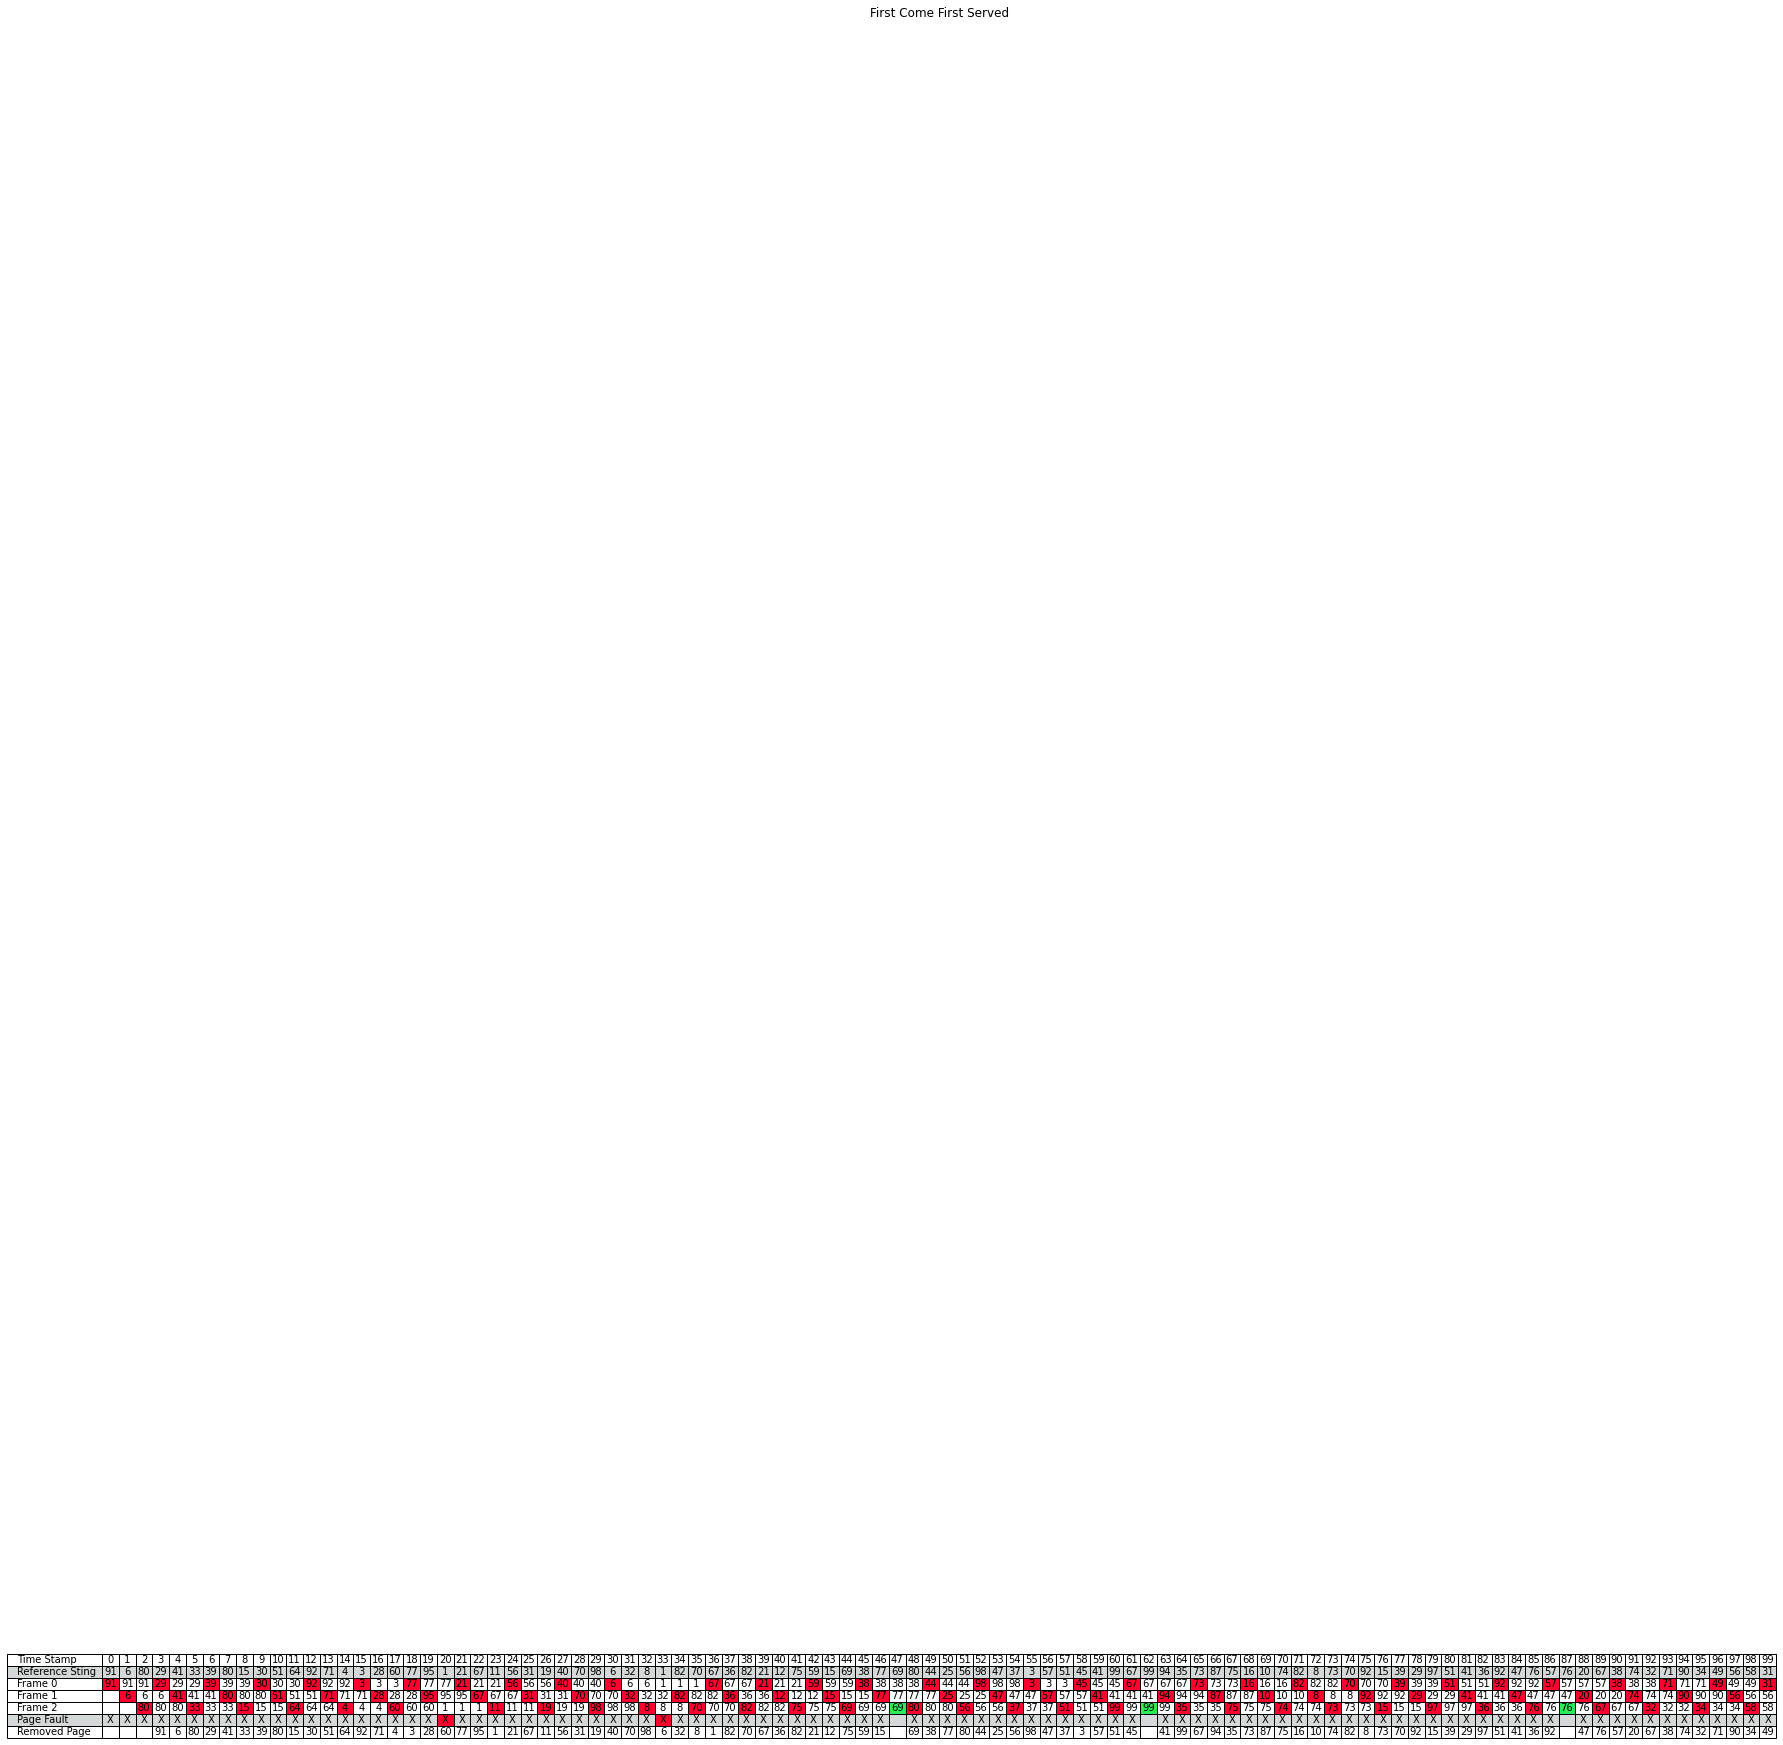

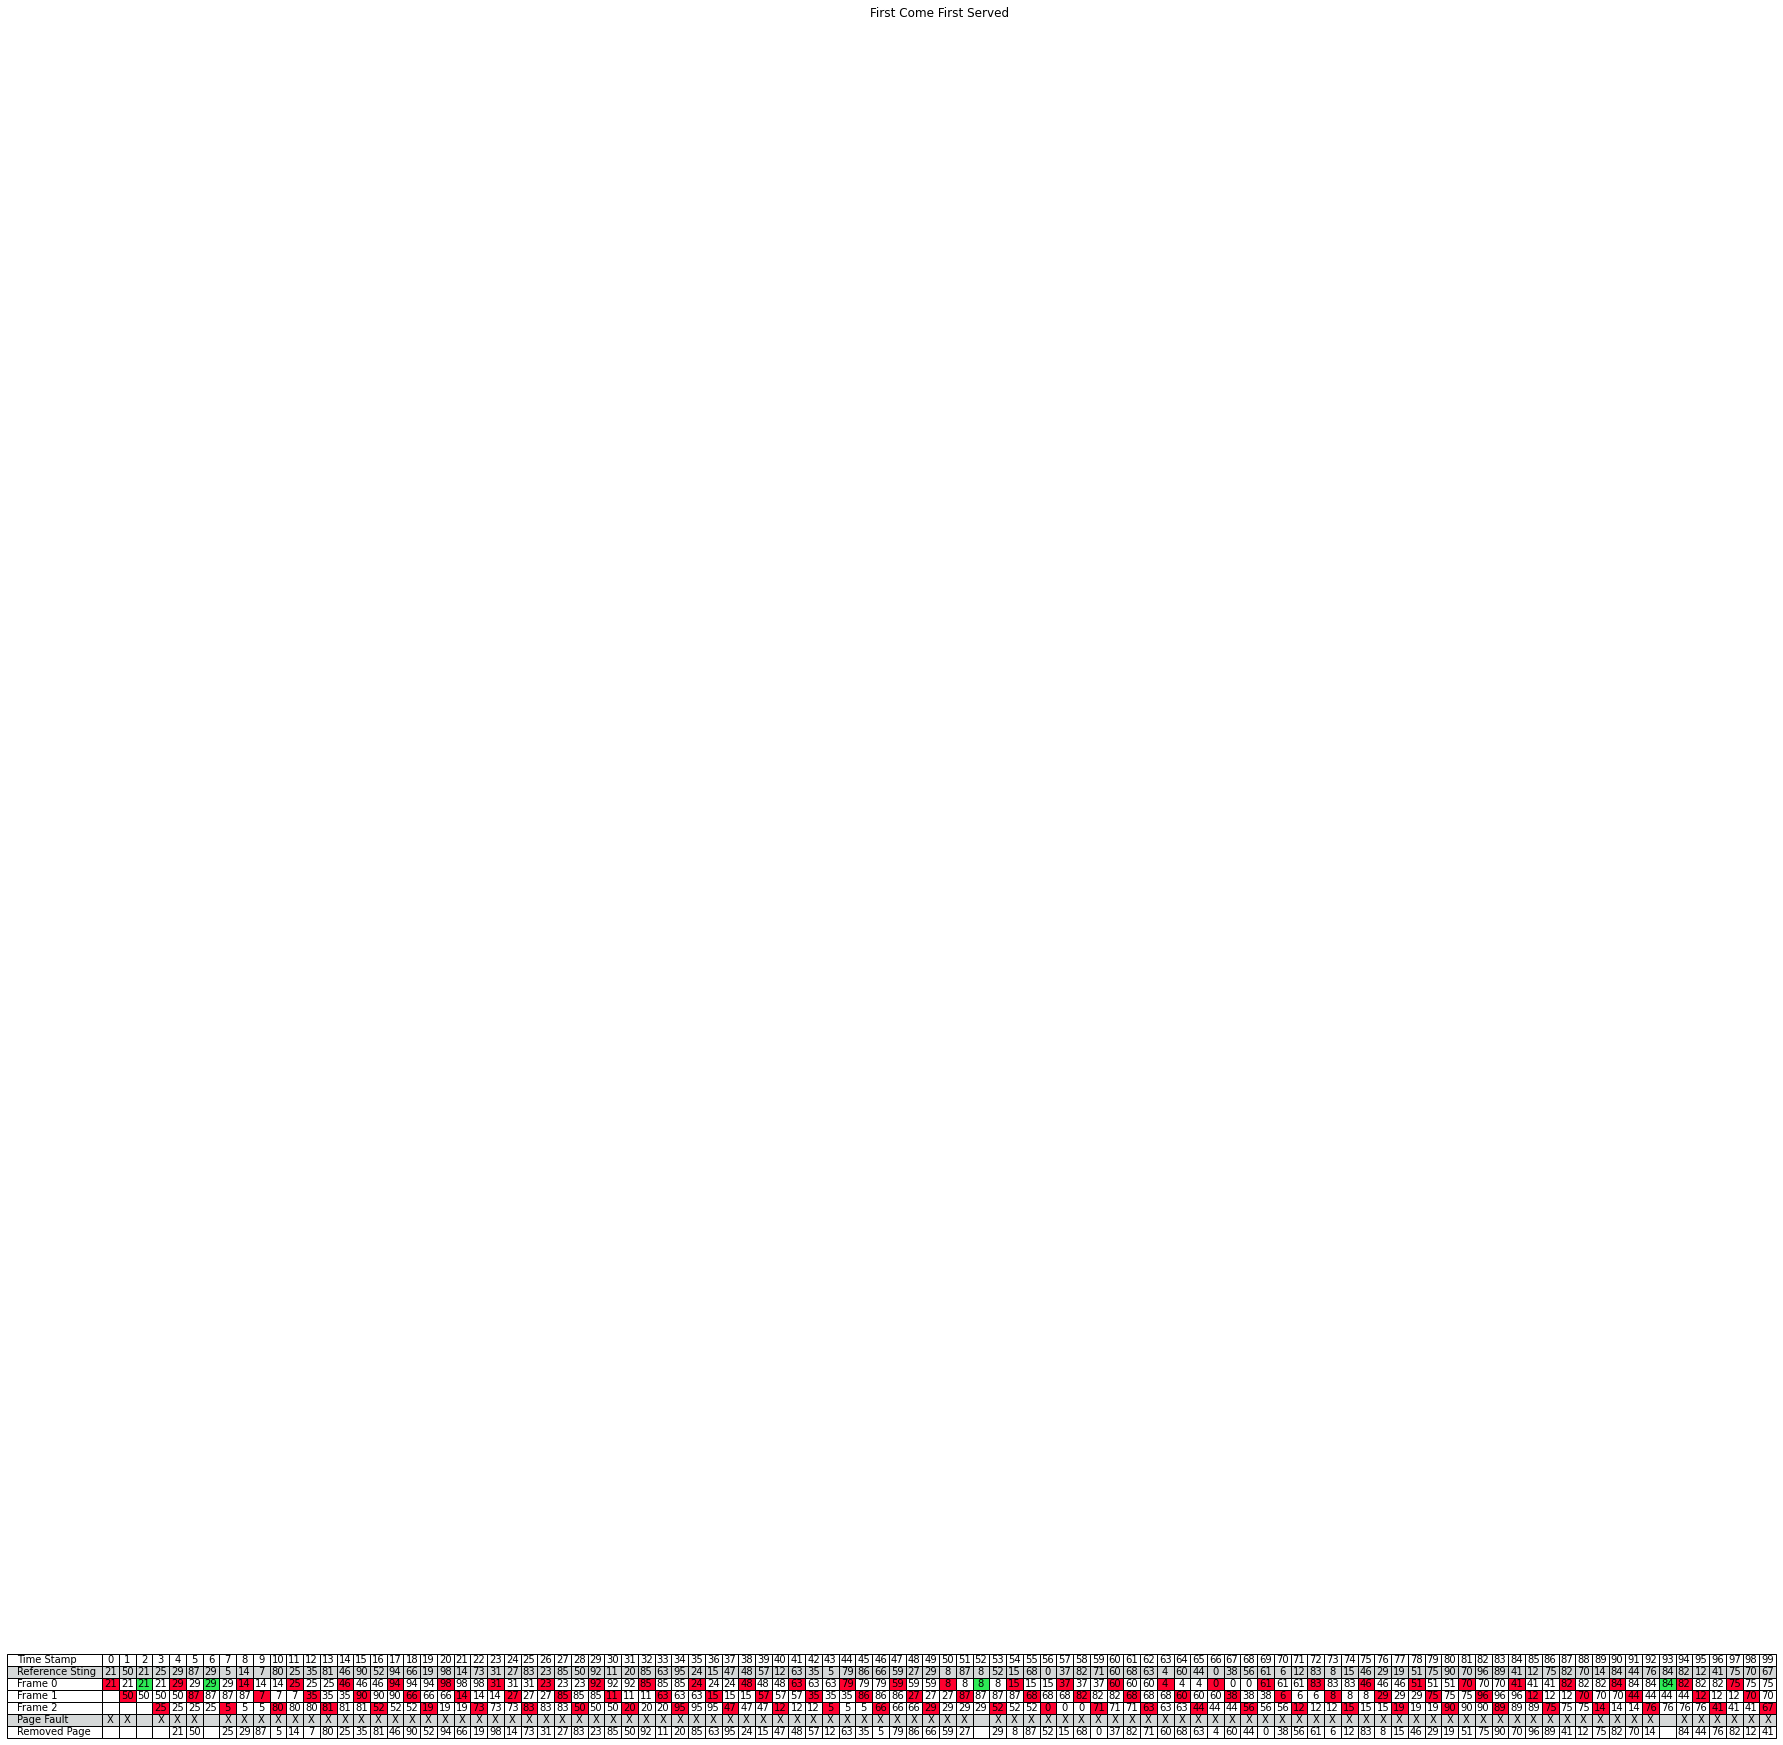

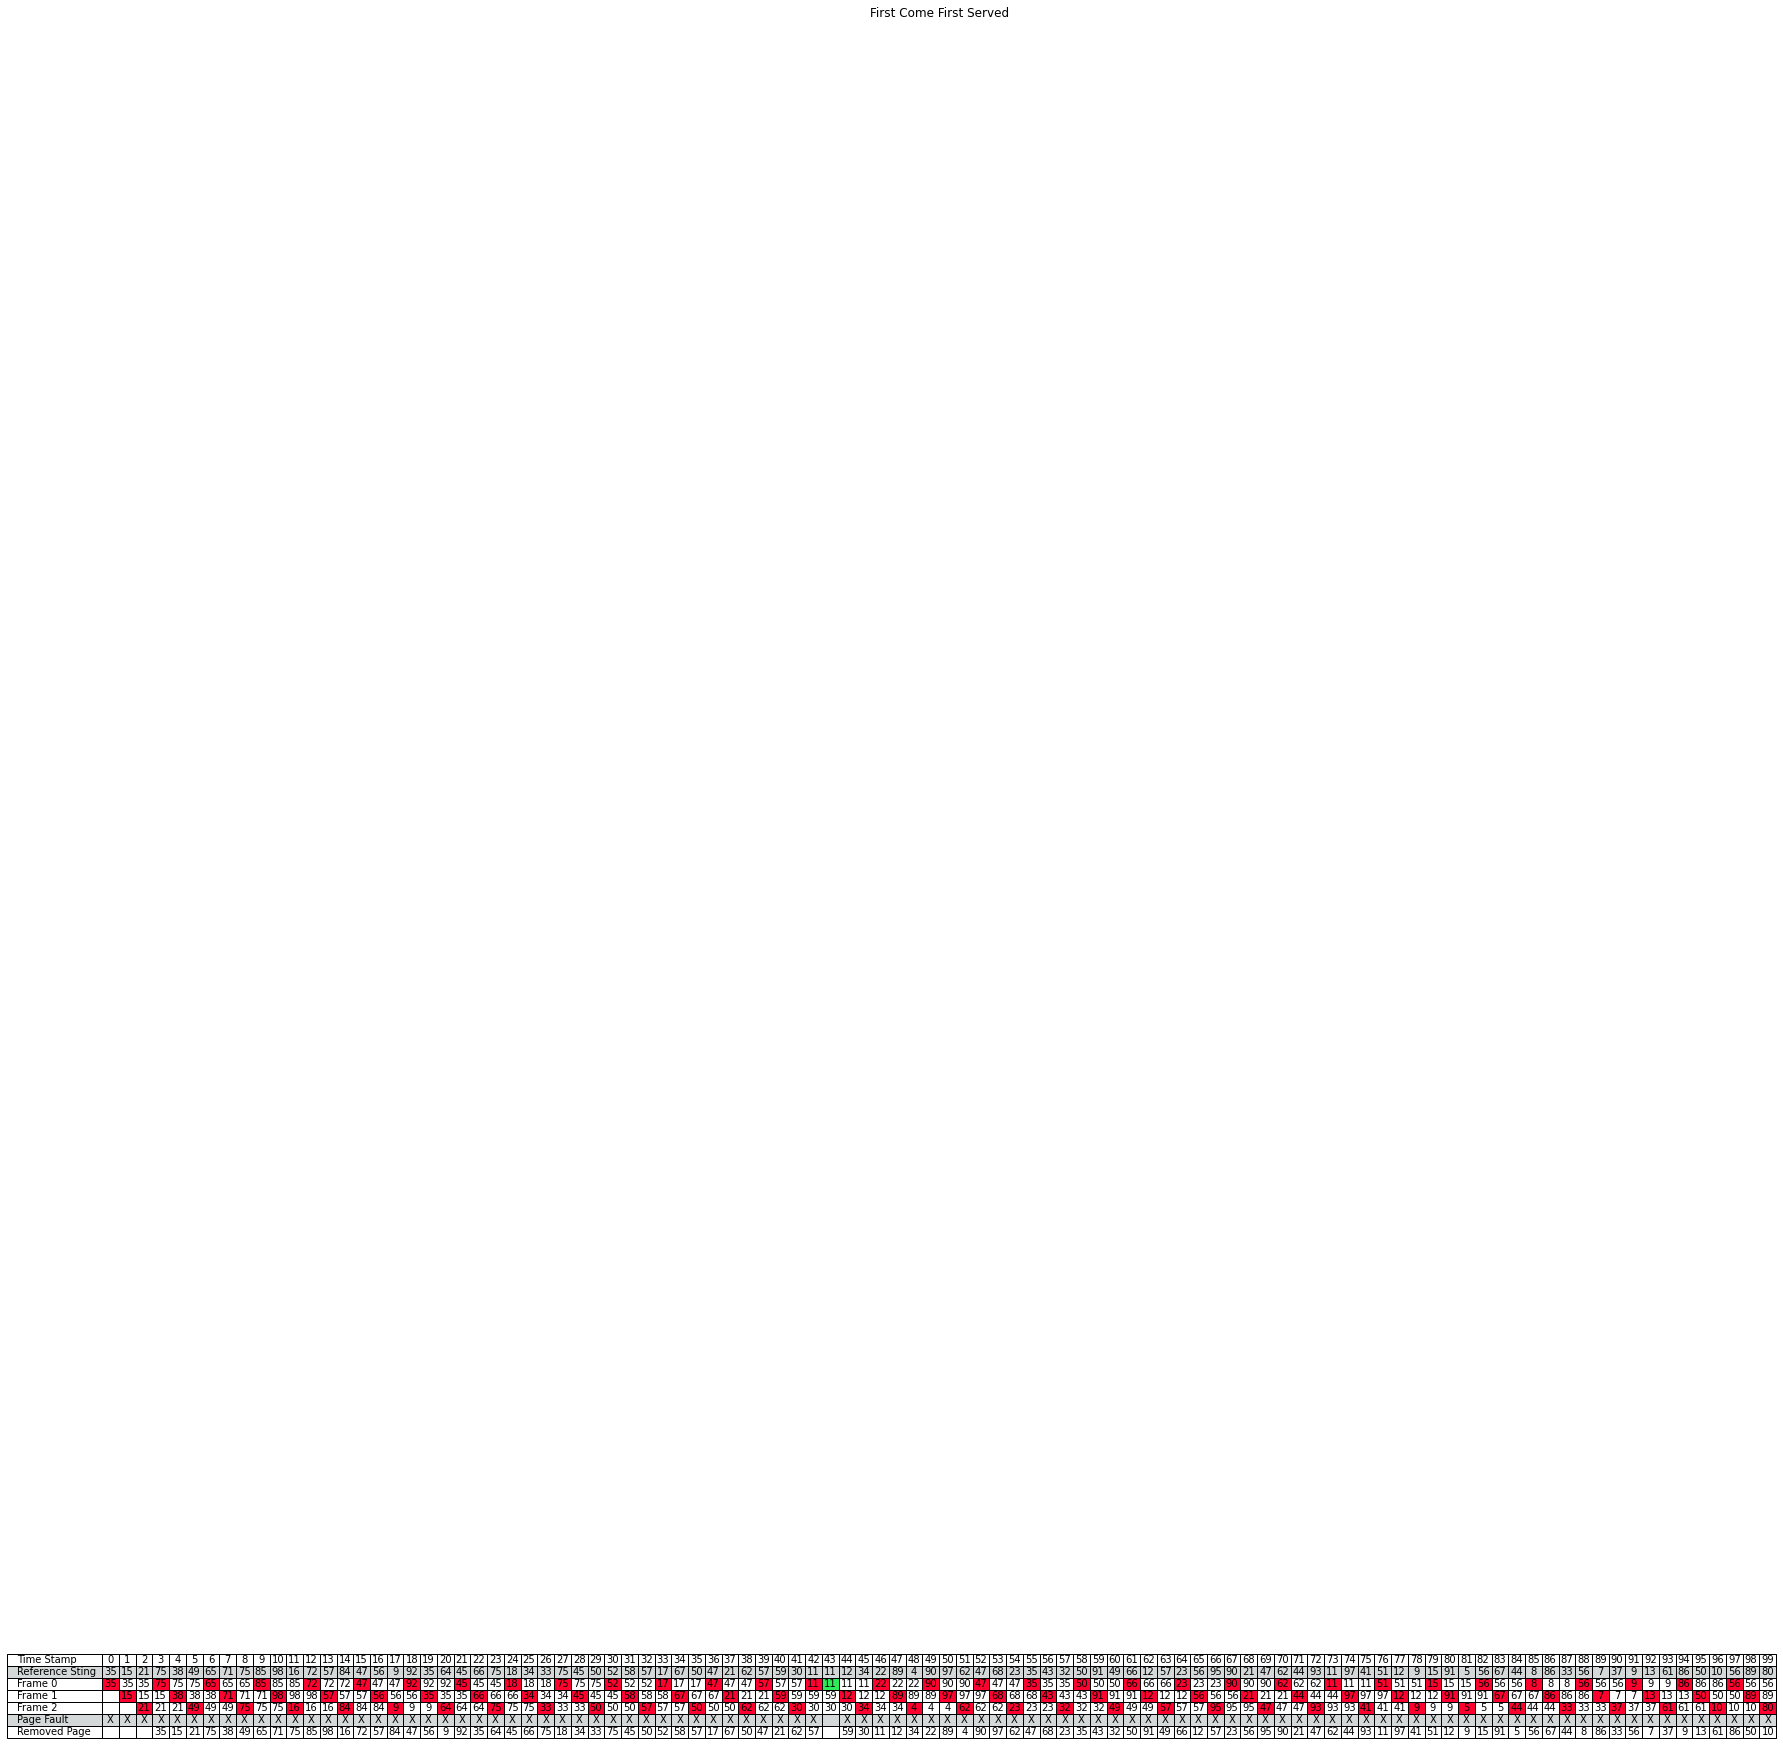

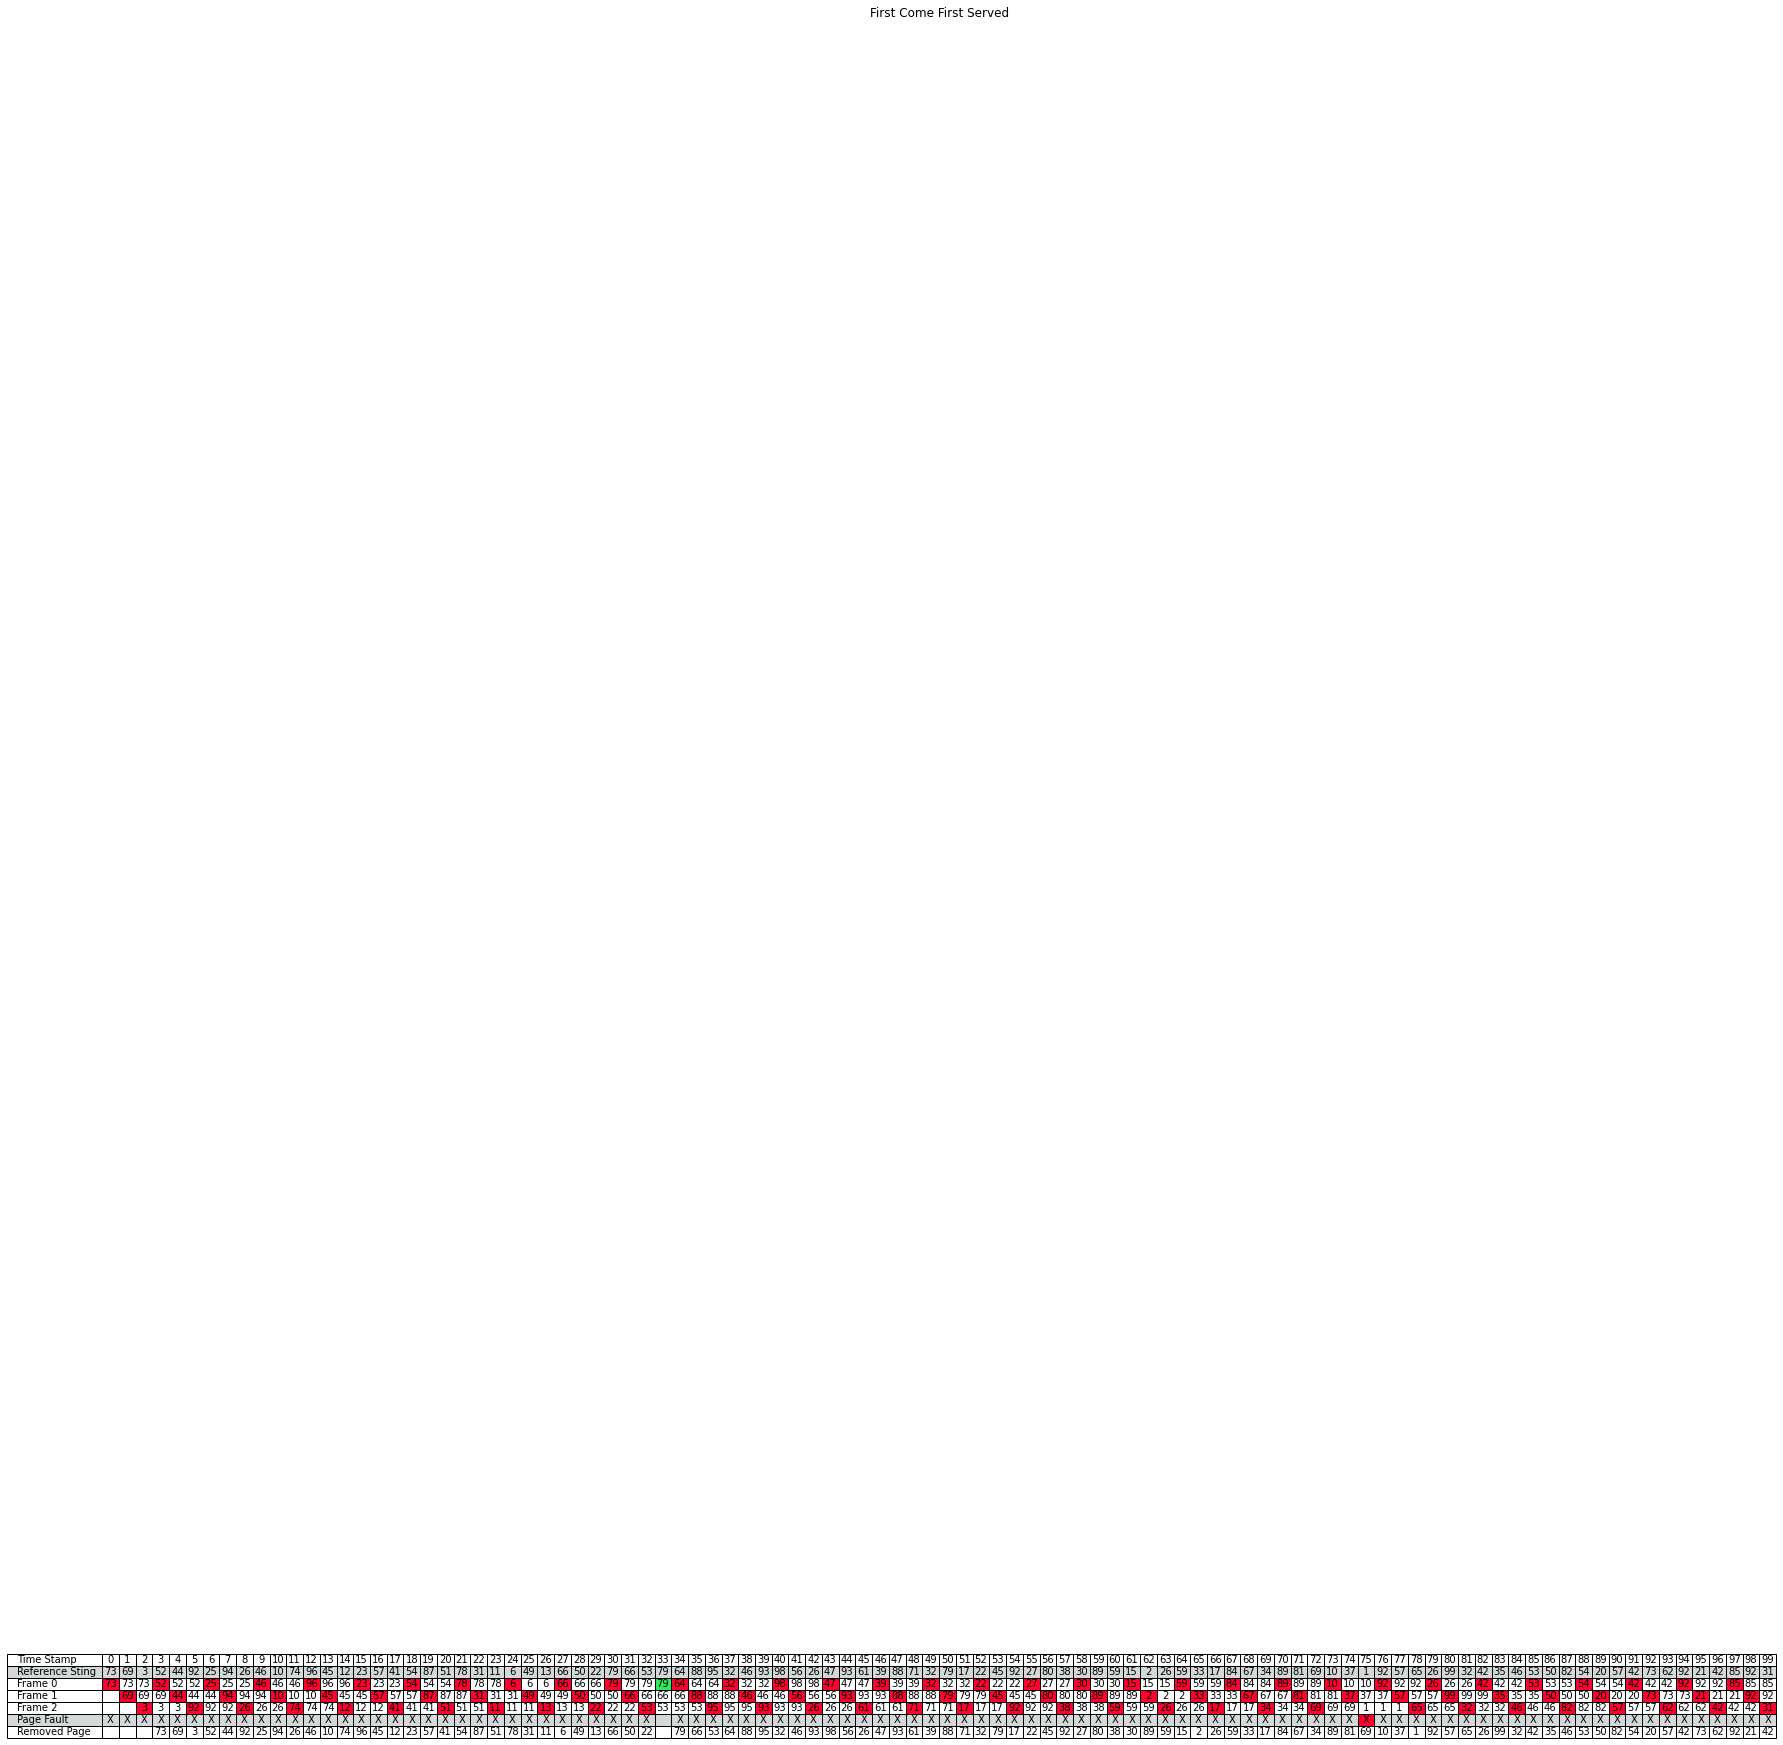

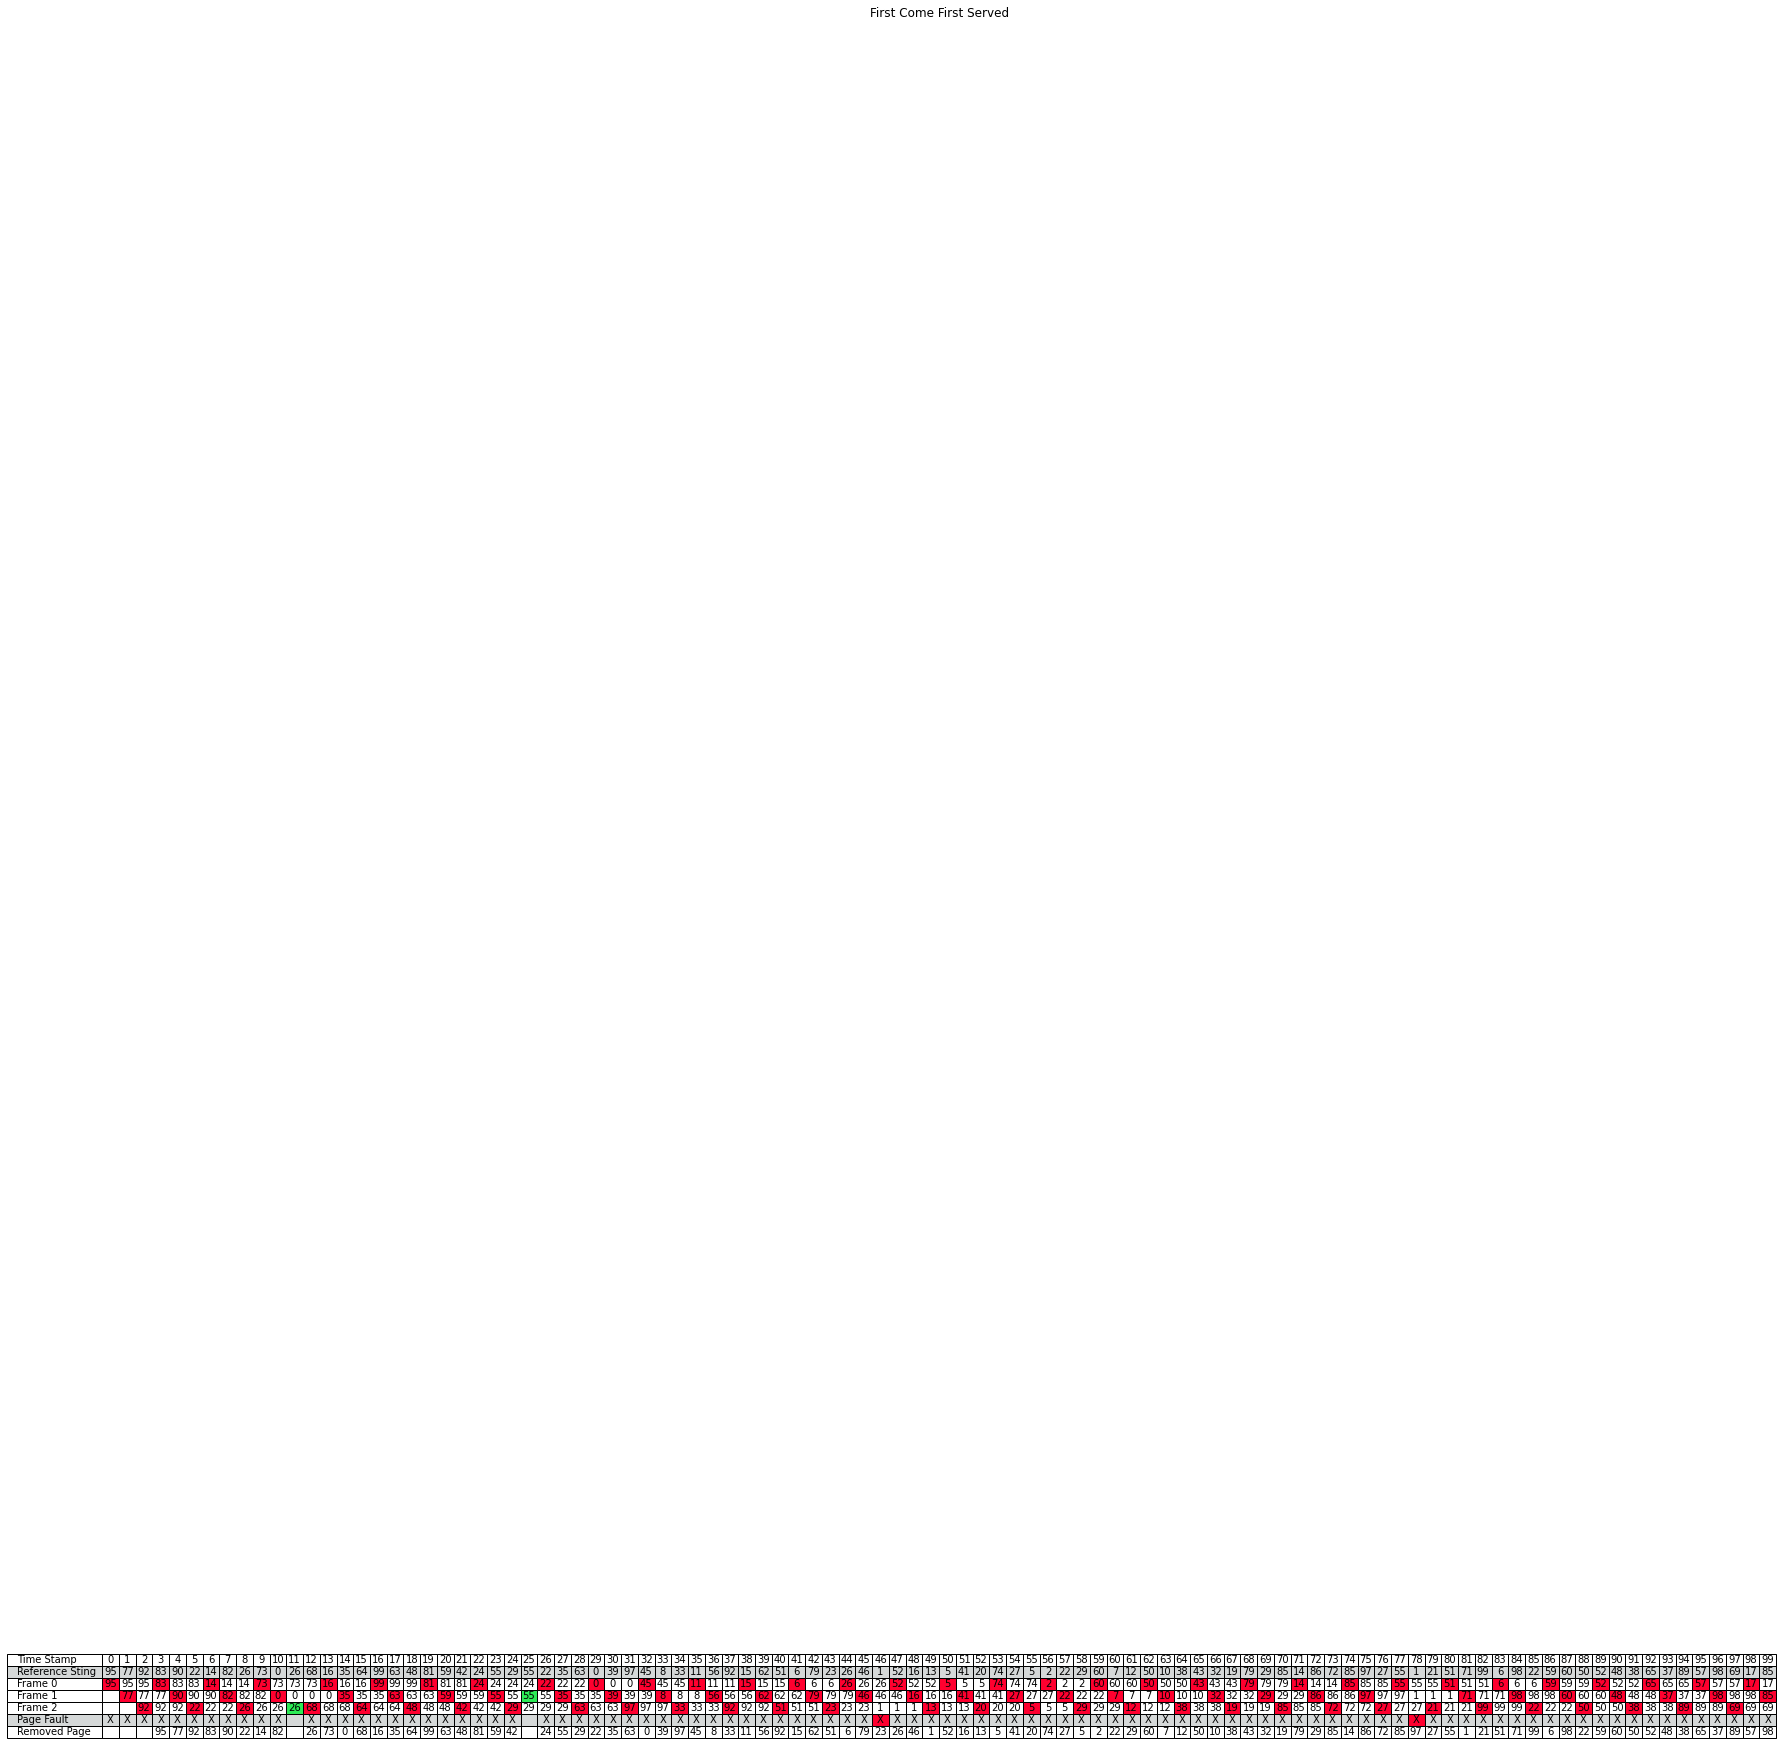

In [64]:
 # Run the simulation
sim_results = simulatePageReplacement(times_to_run = 5,
                                          frames = 3,
                                          reference_string_length = 100,
                                          locality = False,
                                          algorithms = [FCFS])